#**Introduction to Digital Image Processing**
#**Course Code: 361.1.4751**
###**Exercise 3- Transfromation**

For any questions regarding this assignment, please refer to the course forum on the Moodle website. For personal questions, only please email  alonfi@post.bgu.ac.il



In [ ]:
  print("Roey Graif id:315111401\nAmit Hai Bussani id:208384123")

Roey Graif id:315111401
Amit Hai Bussani id:208384123


## **Load the dataset from google drive**

First, the notebook needs to gain access to your drive.

Run the next code:

In [1]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Next:

1.   Make sure the images and *freewilly.mat* file are in the **same** directory as the notebooke file (not in a sub-directory)

2.   Update the directory path to your google drive directory

3.   Run the code

If it worked properly, you should be able to see the 'beatles.png' image.

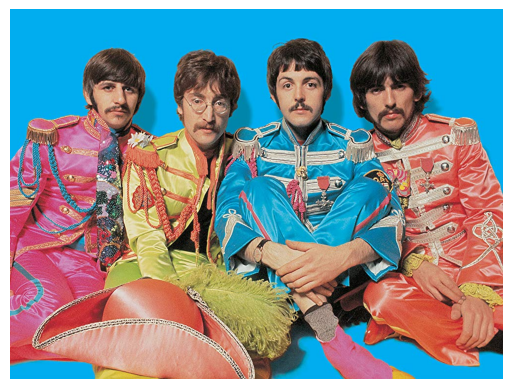

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

directory = "/content/gdrive/My Drive/HW3/"  # Enter the path to your Google Drive directory
os.chdir(directory)

# Load the image
image = cv2.imread('beatles.png')

# Convert the image from BGR to RGB format for proper color display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()

## **1. 2D-Fourier Transform**

### **1.1 Writing your own function**

In this section you **CANNOT** use the `scipy.fft` or `np.fft` libraries and its built-in functions (or any other built-in fft, ifft, fftshift functions).




1. Write your own 2D-FFT function named `dip_fft2(I)` and an inverse-FFT function called `dip_ifft2(FFT)`.

The equations for the FFT and iFFT for an image \( I \) of size \( M × N \):  

$$
F(u+1, v+1) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} I(m+1, n+1) \cdot e^{-2 \pi i \left( \frac{u m}{M} + \frac{v n}{N} \right)}
$$

$$
I(m+1, n+1) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u+1, v+1) \cdot e^{2 \pi i \left( \frac{um}{M} + \frac{vn}{N} \right)}
$$

*Notes:*
1. Your functions must compute according to the equations and not with built-in fft functions.
2. Use matrix implementation (**NOT** for loops).  
3. Remember that the input could be complex both for the fft() and the ifft().  


In [ ]:
def dip_fft2(I):
    """
    Perform a 2D Discrete Fourier Transform (DFT) manually using matrix multiplications.

    Args:
    I : np.array
        Input 2D array (image) to be transformed.

    Returns:
    np.array
        The 2D Fourier Transform of the input image.
    """
    # Get the dimensions of the input image I
    M, N = I.shape

    # Create row and column index matrices m, n, u, and v
    m = np.arange(M).reshape(M, 1)  # Column vector for rows
    n = np.arange(N).reshape(1, N)  # Row vector for columns
    u = np.arange(M).reshape(1, M)  # Row vector for frequency domain rows
    v = np.arange(N).reshape(N, 1)  # Column vector for frequency domain columns

    # Compute the exponential terms for the DFT
    exp_m = np.exp(-2j * np.pi * np.dot(m, u) / M)  # DFT matrix for rows
    exp_n = np.exp(-2j * np.pi * np.dot(v, n) / N)  # DFT matrix for columns

    # Compute the Fourier transform by matrix multiplications
    return np.dot(np.dot(exp_m, I), exp_n)

def dip_ifft2(FFT):
    """
    Perform a 2D Inverse Discrete Fourier Transform (IDFT) manually using matrix multiplications.

    Args:
    FFT : np.array
        Input 2D array (Fourier transformed image) to be inversely transformed.

    Returns:
    np.array
        The 2D Inverse Fourier Transform of the input, returning the original spatial domain image.
    """
    # Get the dimensions of the Fourier transformed image FFT
    M, N = FFT.shape

    # Create row and column index matrices m, n, u, and v
    m = np.arange(M).reshape(M, 1)  # Column vector for rows
    n = np.arange(N).reshape(1, N)  # Row vector for columns
    u = np.arange(M).reshape(1, M)  # Row vector for frequency domain rows
    v = np.arange(N).reshape(N, 1)  # Column vector for frequency domain columns

    # Compute the exponential terms for the IDFT
    exp_m = np.exp(2j * np.pi * np.dot(m, u) / M)  # IDFT matrix for rows
    exp_n = np.exp(2j * np.pi * np.dot(v, n) / N)  # IDFT matrix for columns

    # Perform the matrix multiplication to get the inverse Fourier transform and normalize by dividing by MN
    # The absolute value is taken to get the real part of the image
    return np.abs(np.dot(np.dot(exp_m, FFT), exp_n) / (M * N))


2. When analyzing the frequency components of signals, it can be helpful to shift the zero-frequency
components to the center. Write your own shift zero-frequency component to center of spectrum
along two dimensions, function named `dip_fftshift(FFT)`. This operation is illustrated in the following image:


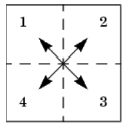


In [ ]:
def dip_fftshift(FFT):
    """
    This function rearranges the zero-frequency components of a 2D Fourier transform, moving them
    to the center of the spectrum. It's particularly useful for visualizing the FFT by centering the
    low frequencies.

    Args:
    FFT : np.array
        The 2D Fourier transform of an image which we want to shift.

    Returns:
    np.array
        A new array with the zero-frequency components centered.
    """
    # Retrieve the dimensions of the input array to handle any size of 2D FFT.
    M, N = FFT.shape

    # Determine the midpoint of each dimension to identify where to split the quadrants.
    midM, midN = M // 2, N // 2

    # Prepare an empty array of the same size as the FFT to hold the rearranged data.
    shifted_FFT = np.zeros_like(FFT)

    # Shift the quadrants around:
    # Move the top-left quadrant to the bottom-right.
    shifted_FFT[:midM, :midN] = FFT[midM:, midN:]

    # Move the top-right quadrant to the bottom-left.
    shifted_FFT[:midM, midN:] = FFT[midM:, :midN]

    # Move the bottom-left quadrant to the top-right.
    shifted_FFT[midM:, :midN] = FFT[:midM, midN:]

    # Move the bottom-right quadrant to the top-left.
    shifted_FFT[midM:, midN:] = FFT[:midM, :midN]

    # Return the FFT with its zero-frequency component now centered.
    return shifted_FFT


3. Read the *beatles.png* image accompanied to this assignment, convert it to grayscale normalized image. Show the image and print its dimensions.


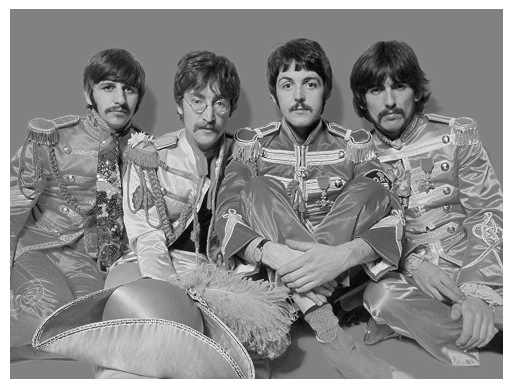

Image dimensions: (750, 1000)


In [ ]:
# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize the grayscale image
normalized_grayscale_image = cv2.normalize(grayscale_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Display the normalized grayscale image
plt.imshow(normalized_grayscale_image, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()
# Print the dimensions of the image
print(f"Image dimensions: {normalized_grayscale_image.shape}")

In [ ]:
def dip_fftshift(FFT):
    """
    Perform an FFT shift to centralize the zero-frequency component in the 2D Fourier transformed array.
    This shift is particularly useful for visualizing and processing the FFT output where the zero-frequency
    component is moved to the center of the array.

    Args:
    FFT : np.array
        The 2D Fourier transformed array that needs to be shifted.

    Returns:
    np.array
        The shifted array with the zero-frequency component at the center.
    """
    # Retrieve the dimensions of the Fourier transformed array to manage any array size.
    M, N = FFT.shape

    # Calculate the midpoint indices for the array dimensions to define where quadrants split.
    midM, midN = M // 2, N // 2

    # Initialize a new array of the same shape as FFT to store the shifted result.
    shifted_FFT = np.zeros_like(FFT)

    # Rearrange the quadrants of the FFT to center the zero-frequency component:
    # Move the bottom right quadrant to the top left.
    shifted_FFT[:midM, :midN] = FFT[midM:, midN:]

    # Move the bottom left quadrant to the top right.
    shifted_FFT[:midM, midN:] = FFT[midM:, :midN]

    # Move the top right quadrant to the bottom left.
    shifted_FFT[midM:, :midN] = FFT[:midM, midN:]

    # Move the top left quadrant to the bottom right.
    shifted_FFT[midM:, midN:] = FFT[:midM, :midN]

    # Return the shifted FFT array with the zero-frequency component centralized.
    return shifted_FFT


4. Compute the 2D-FFT of the image and shift the output image using the functions you built.
Display the log of the amplitude and the pahse of the resulting image. Use  `matplotlib.pyplot.imshow()` to display the results.

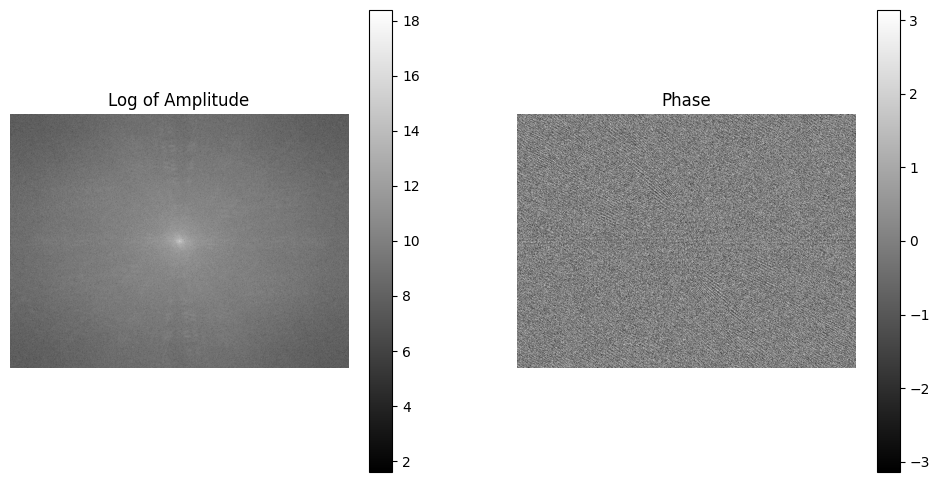

In [ ]:
# Assume grayscale_image is already defined as a grayscale image

# Perform a 2D Fast Fourier Transform on the grayscale image
FFT = dip_fft2(grayscale_image)

# Shift the zero-frequency component to the center of the Fourier transform
shifted_FFT = dip_fftshift(FFT)

# Calculate the logarithm of the amplitude to enhance visibility and prevent issues with log(0)
# Adding 1 ensures there's no logarithm of zero
log_amplitude = np.log(np.abs(shifted_FFT) + 1)

# Calculate the phase of the Fourier transform to analyze phase information
phase = np.angle(shifted_FFT)

# Setup the display using matplotlib for visualization of the results
plt.figure(figsize=(12, 6))

# Display the log amplitude
plt.subplot(1, 2, 1)
plt.imshow(log_amplitude, cmap='gray')
plt.title('Log of Amplitude')  # Title for the amplitude plot
plt.colorbar()  # Show color scale
plt.axis('off')  # Remove axes to enhance view

# Display the phase
plt.subplot(1, 2, 2)
plt.imshow(phase, cmap='gray')
plt.title('Phase')  # Title for the phase plot
plt.colorbar()  # Show color scale
plt.axis('off')  # Remove axes to enhance view

# Render the plots
plt.show()


5. Reconstruct the original image by using your inverse-FFT function. Is it identical to the original
image? Note that the output of the iFFT are complex numbers - you should display only the real
part of the image using `matplotlib.pyplot.imshow(np.real(-))`.
Print the dimensions of the image and make sure its the same as 2.1.3

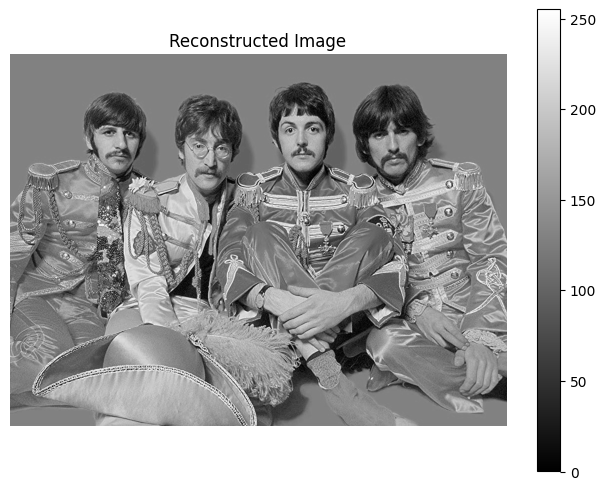

Dimensions of the reconstructed image: (750, 1000)


In [ ]:
# Compute the 2D Fast Fourier Transform (FFT) of the grayscale image
# This step converts the spatial domain representation of the image to the frequency domain.
FFT = dip_fft2(grayscale_image)

# Shift the zero-frequency component to the center of the Fourier transformed array
# This shift is crucial for analyzing the frequency components more intuitively.
shifted_FFT = dip_fftshift(FFT)

# Perform the inverse FFT on the shifted FFT to reconstruct the original image
# The inverse FFT converts the frequency domain representation back to the spatial domain.
reconstructed_image = dip_ifft2(shifted_FFT)

# Display the reconstructed image using matplotlib
# The real part of the complex image is visualized, as the actual image content is in the real part.
plt.figure(figsize=(8, 6))
plt.imshow(np.real(reconstructed_image), cmap='gray')
plt.title('Reconstructed Image')
plt.colorbar()  # Add a color bar to indicate the scale of the image intensities
plt.axis('off')  # Hide axes to focus on the image content
plt.show()

# Print the dimensions of the reconstructed image to verify that the size matches the original
print("Dimensions of the reconstructed image:", reconstructed_image.shape)
# The reconstructed image should have the same dimensions as the original image to ensure accuracy.

# The reconstructed_real variable holds the real part of the reconstructed image,
# which is what is typically used for further image processing or analysis.
reconstructed_real = np.real(reconstructed_image)


### **1.2 Transformation properties**
In this section you **CAN** use built-in fft functions.

#### **1. Linearity**

(a) Load the freewilly.mat file enclosed to the assignment. Display it as an image using
`plt.imshow()` and print its dimensions. **Don’t** normalize this file.

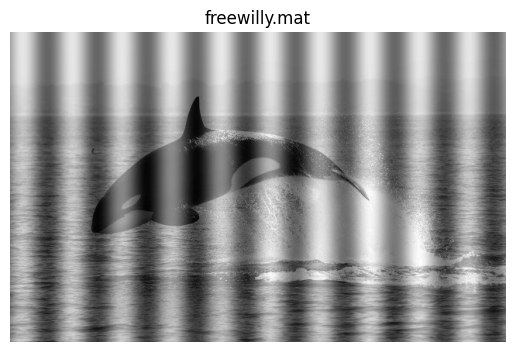

Dimensions: (400, 640)


In [4]:
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat('freewilly.mat')
image_data = data['freewilly']    #I used print(data.keys()) to find the key to get the data

plt.imshow(image_data, cmap='gray')
plt.title('freewilly.mat')
plt.axis('off')
plt.show()

print("Dimensions:", image_data.shape)


 (b) As you can see, Willy the whale is imprisoned. Your job is to free Willy! To do that, you are told that the prison bars are made of a sinusoidal signal in the X axis that was **added** to the original image:

$$
0.5 \cdot \sin\left(\frac{2\pi f_{x}}{N} x\right)
$$

where \( N \) is the number of columns in the image. Given this image, find and print the spatial frequency of the prison bars fₓ. Explain your answer!

*Hint:* Try to plot the first row of the image if you find it helpful.


In [5]:
first_row = image_data[0, :]        # first row on the x axis
fft_row = np.fft.fft(first_row)     #FFT of the first row
frequencies = np.fft.fftfreq(len(first_row))  # frequency bins

fft_magnitude = np.abs(fft_row)     # compute magnitude of FFT
dominant_frequency_index = np.argmax(fft_magnitude[1:]) + 1  # we need to find the dominent frequency to find the bars therefor we need to skip DC

fx = np.abs(frequencies[dominant_frequency_index])  # we found fx
print(f"Spatial frequency of the prison bars (f_x): {fx}")

Spatial frequency of the prison bars (f_x): 0.015625


(c) Based on your answer in section b, create the image of the prison bars and display it.

Print the dimensions and **Make sure** it has the same as *frewilly.mat*.


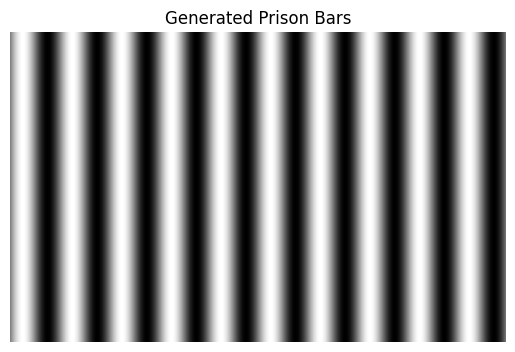

dimensions of the prison bars are: (400, 640)


In [6]:
rows, cols = image_data.shape  # same dimensions of freewilly.mat
fx = 0.015625  #the frequency we found (an approximation)
x = np.arange(cols) #x-axis pixel indices

sinusoidal_row = 0.5 * np.sin((2 * np.pi * fx * x))   #now that we have everything we can create the signal

# Replicate the sinusoidal signal across all rows
prison_bars = np.tile(sinusoidal_row, (rows, 1))

# Display the prison bars
plt.imshow(prison_bars, cmap='gray')
plt.title("Generated Prison Bars")
plt.axis('off')
plt.show()

print("dimensions of the prison bars are:", prison_bars.shape)

(d) Compute the 2D-FFT of the prison bars image, and display its **amplitude** (use the function `abs()`).

Explain this result – provide a mathematical proof that this is the expected Fourier transform.



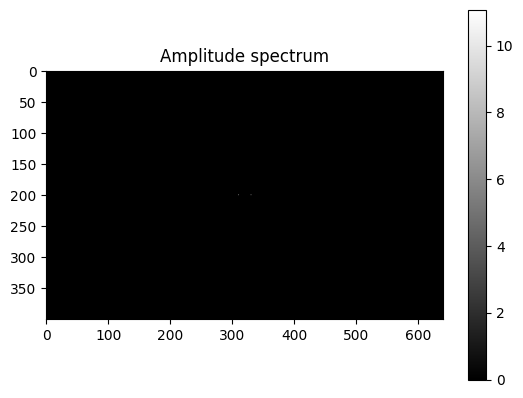

In [7]:
fft_prison_bars = np.fft.fft2(prison_bars)  #2D FFT
fft_prison_bars_shifted = np.fft.fftshift(fft_prison_bars)  #move zero frequency to center
amplitude_spectrum = np.abs(fft_prison_bars_shifted)

plt.imshow(np.log(1 + amplitude_spectrum), cmap='gray')  # log scale for better visibility
plt.title("Amplitude spectrum")
plt.colorbar()
plt.show()


**Mathematical Proof: **
We need to show why there are 2 white dots in the 2D fourier transform.The prison bars image is represented by:
P(x,y)=Asin(2π*fx*x), A is an amplitude.

Using Eulers formula: sin(θ)= (e^jθ-e^-jθ)/2j

We can get: P(x,y) = A(e^j2π*fx*x-e^-j2π*fx*x)/2j

We need to do double integral on P(x,y)e^-j2π(ux+vy) to get the fourier transform. Let us note that P(x,y) does not depend on y. There for we can write:

F = ∫Asin(2π*fx*x)e^-j2π(ux)*∫e^-j2π(vy)  where the integral goes from -∞ to ∞.

Let us denote: δ(v)=∫e^-j2π(vy)

So now we can basically just look at the 1D fourier transform on x:

∫Asin(2π*fx*x)e^-j2π(ux)

and using the Euler formula we saw earlier we can write:

sin(2π*fx*x) = (e^j2π*fx*x-e^-j2π*fx*x)/2j

and then after computing the integral on the x-axis from -∞ to ∞ we get:

F_x = (A/2j)*(δ(u-fx)-δ(u+fx))

now looking at F we get:

F = (A/2j)(δ(u-fx)-δ(u+fx))*δ(v)

We can see that we get 2 peaks at the horizontal frequencies u = fx and u = -fx.

That is the reason for the 2 bright dots we get when we compute |F| on the x axis.

(e) Explain how you can free Willy (i.e., filter out the prison bars) through the Fourier domain.

Based on your answer, write a function `Free_Willy(Willy)` that **returns and displays** Willy without the prison bars. Display the result.


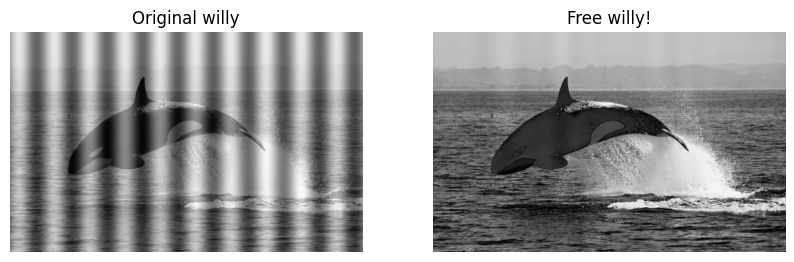

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def Free_Willy(Willy):
    fft_Willy = np.fft.fft2(Willy)
    fft_Willy_shifted = np.fft.fftshift(fft_Willy)  #shift zero frequency to the center
    rows, cols = Willy.shape
    crow, ccol = rows // 2, cols // 2  # center of the FFT
    mask = np.ones((rows, cols), dtype=np.float32)    #FFT shifted array for masking
    fx_index = int(0.015625 * cols)  #convert fx to index in the frequency domain

    radius = 5    #We tried a few radiuses untill we got the best one
    mask[crow, ccol - fx_index - radius:ccol - fx_index + radius] = 0  #remove the white dots from earlier
    mask[crow, ccol + fx_index - radius:ccol + fx_index + radius] = 0  #remove the other white dot
    filtered_fft = fft_Willy_shifted * mask   #apply the mask

    filtered_fft_shifted_back = np.fft.ifftshift(filtered_fft)    #we will do the oppisite of what we did at the begining to go back to the main image
    Willy_cleaned = np.fft.ifft2(filtered_fft_shifted_back)       #using the inverse transform to go back
    Willy_cleaned = np.abs(Willy_cleaned)
    return Willy_cleaned

Willy_cleaned = Free_Willy(image_data)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original willy")
plt.imshow(image_data, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Free willy!")
plt.imshow(Willy_cleaned, cmap='gray')
plt.axis('off')

plt.show()

What we did was go to the furier transform and since we know that the 2 white dots we saw earlier, are the reason for the bars we can simply just remove them since we know where they are, and thats exactly what we did and then we can go back to the original image (inverse transform) and get the free willy image.

#### **2. Scaling, translation and seperability**

(a) Initialize a 128×128 all-zeros matrix. At the center of it, place a 40×40 all-ones square (in pixels 44:83 in each dimension).

Display the image and its 2D-FFT shifted amplitude (log scaled) and phase. Explain why it looks the way it does.


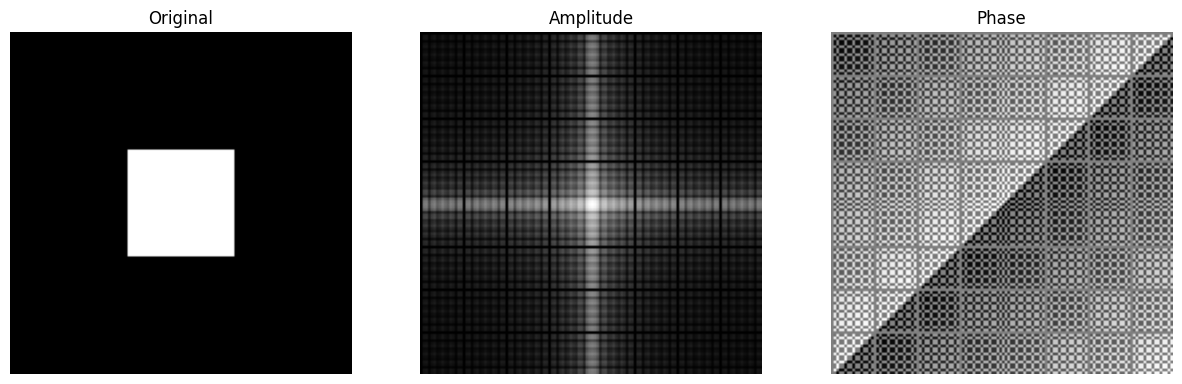

In [11]:
image = np.zeros((128, 128))
image[44:84, 44:84] = 1   #Im not sure if you want 44:84 or 44:83 (but it doesnt really matter)

fft_image = np.fft.fft2(image)  #2D FFT
fft_shifted = np.fft.fftshift(fft_image)  #zero frequency component to center

amplitude_spectrum = np.abs(fft_shifted)  # amplitude
phase_spectrum = np.angle(fft_shifted)  # phase

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Amplitude")
plt.imshow(np.log(1 + amplitude_spectrum), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Phase")
plt.imshow(phase_spectrum, cmap='gray')
plt.axis('off')

plt.show()

**Explanation**

The results show that the Fourier Transform of the square creates a cross pattern in the frequency picture. The center is the brightest spot because it’s the average brightness of the image. The cross happens because the square is made of straight edges, and its Fourier transform creates waves (sincs) in the horizontal and vertical directions. The phase just shows how the waves are lined up and it’s mostly simple because the square is symmetric. The log scale is used to make the smaller details easier to see.

(b) Repeat section (a) only this time place the white square at rows 64:103 and columns 64:103. What are the similarities and differences in the 2D- FFT from section (a)? Explain why and base your answer on the **mathematical relationship** between the two images and their 2D-Fourier transforms.

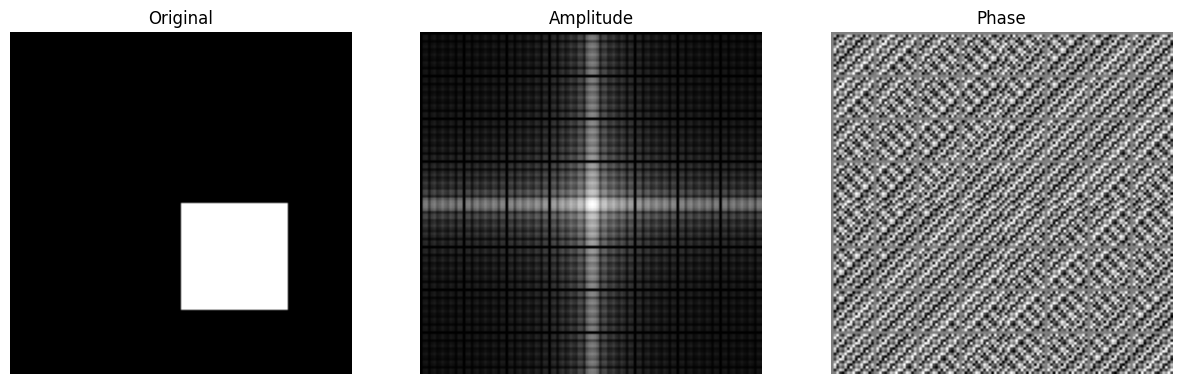

In [12]:
image = np.zeros((128, 128))
image[64:104, 64:104] = 1     #same code as before except for this

fft_image = np.fft.fft2(image)  #2D FFT
fft_shifted = np.fft.fftshift(fft_image)  #zero frequency component to center

amplitude_spectrum = np.abs(fft_shifted)  # amplitude
phase_spectrum = np.angle(fft_shifted)  # phase

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Amplitude")
plt.imshow(np.log(1 + amplitude_spectrum), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Phase")
plt.imshow(phase_spectrum, cmap='gray')
plt.axis('off')

plt.show()

**Explanation**

The 2D Fourier Transform of the shifted square has the same amplitude spectrum as the centered square because the size and shape of the square are unchanged and the Fourier Transform of a square always results in a cross shaped sinc pattern. But the phase spectrum is different because shifting the square in the spatial domain introduces a phase shift in the frequency domain. This phase shift appears as diagonal gradients in the phase spectrum and reflects the new position of the square. While the amplitude spectrum describes the squares size and structure which remains constant the phase spectrum captures its position which changes when the square is moved.

(c) Initialize a 128 × 128 all-zeros matrix. At the center of it, place a 80 × 20 all-ones rectangle and repeat section (b).

 *Note:* compare the results only to those in section (a).

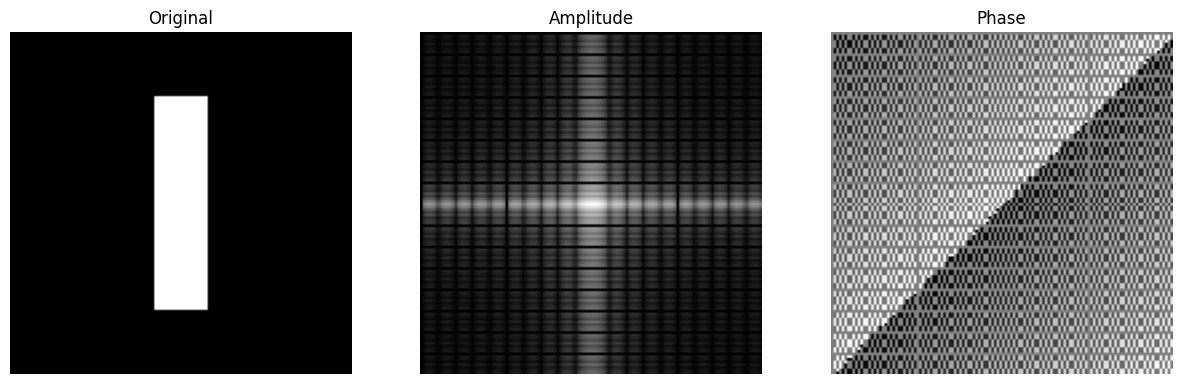

In [13]:
image = np.zeros((128, 128))
image[24:104, 54:74] = 1    #now its a rectangle of 1s in the center

fft_image = np.fft.fft2(image)  #2D FFT
fft_shifted = np.fft.fftshift(fft_image)  #zero frequency component to center

amplitude_spectrum = np.abs(fft_shifted)  # amplitude
phase_spectrum = np.angle(fft_shifted)  # phase

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Amplitude")
plt.imshow(np.log(1 + amplitude_spectrum), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Phase")
plt.imshow(phase_spectrum, cmap='gray')
plt.axis('off')

plt.show()

**Explanation**

The amplitude spectrum of the 80x20 rectangle is different from the square in Section a because the rectangles shape is longer in one direction. This makes the area in the vertical direction closer together while in the horizontal direction is is wider apart. The phase spectrum is still simple like in Section a because the rectangle is centered and symmetric.

(d) Can you represent the image from section (c) using two 1D vectors? Explain how.

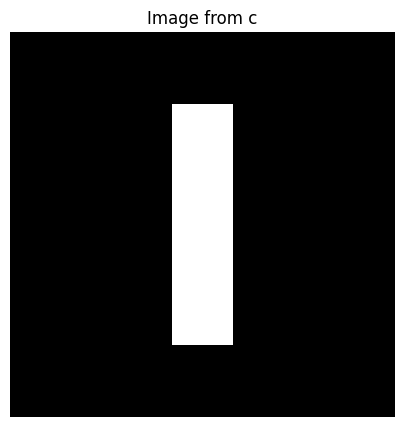

In [14]:
v_r = np.zeros(128)
v_r[24:104] = 1
v_c = np.zeros(128)
v_c[54:74] = 1
image_reconstructed = np.outer(v_r, v_c)    #we can use the dot product of the 2 vectors to get a matrix (Explanation below)

plt.figure(figsize=(5, 5))
plt.title("Image from c")
plt.imshow(image_reconstructed, cmap='gray')
plt.axis('off')
plt.show()

we know that if we v1*v2 and v2 is transposed then we get a matrix which is:

(v1)i*(v2T)j = (A)ij

Where i,j are the indexes and A is the matrix therefor for (A)ij to be 1 we need both (v1)i=1 and (v2T)j=1 therefor it will happen only in the rows of [24:104] and in th colums of [54:74].

(e) Explain how can you compute the 2D-FFT of an image using 1D-FFTs if the image is
separable into two 1D vectors. Write a function `sep_fft2(v1,v2)` that receives a pair of 1D
vectors (of lengths N1 and N2 respectively), and returns the 2D-FFT (a N1*N2 matrix)
based on the 1D-FFTs of the vectors (DO NOT use fft2 here). Apply this function on the
two vectors you described in section (d), and display the resulting 2D-FFT (both log scaled amplitude and phase). Is it identical
to the 2D-FFT of the image from section (c)?

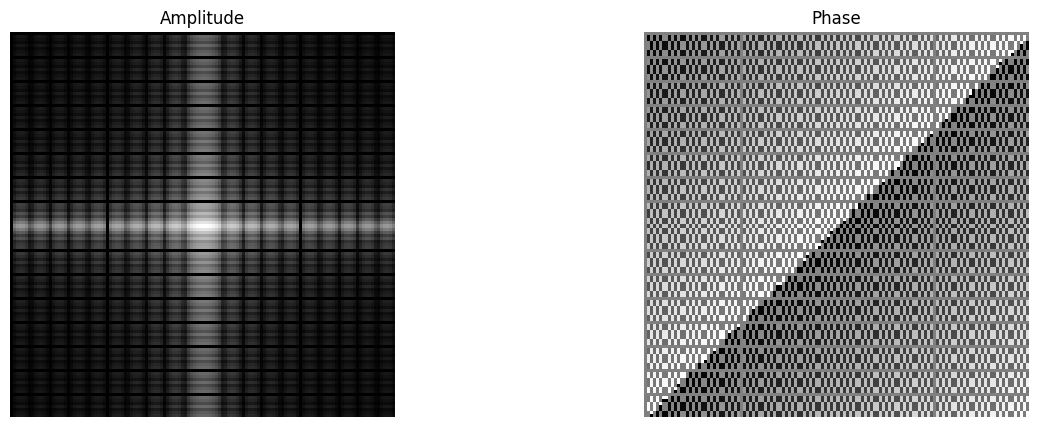

In [15]:
def sep_fft2(v1, v2):
    image = np.outer(v1, v2)    #the outer product like we did before
    fft_rows = np.fft.fft(image, axis=1)    #1D FFT for the rows
    fft_2d = np.fft.fft(fft_rows, axis=0)   #1D FFT on the columns => 2D FFT
    return fft_2d

v_r = np.zeros(128)
v_r[24:104] = 1     #the vectors from earlier
v_c = np.zeros(128)
v_c[54:74] = 1

fft_result = sep_fft2(v_r, v_c)   #using our new function for the FFT
amplitude_spectrum = np.abs(fft_result)   #amplitude
phase_spectrum = np.angle(fft_result)     #phase

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Amplitude")
plt.imshow(np.log(1 + np.fft.fftshift(amplitude_spectrum)), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Phase")
plt.imshow(np.fft.fftshift(phase_spectrum), cmap='gray')
plt.axis('off')
plt.show()

The results are the same thanks to the separabilty property that ensures that performing the 2D FFT will be the same as the 1D FFT on the row and then 1D ffT on the columns. The outer product of two 1D vectors allows the 2D transform to be computed independently along each dimension. The amplitude spectrum retains the sinc patterns from Section c while the phase spectrum reflects the symmetry and position of the image.